In [1]:
import matplotlib.pyplot as plt
from dataset import Dataset, BLAT_ECOLX, PABP_YEAST
import pandas as pd

In [2]:
# This will load the dataset for the specific dataset (BLAT_ECOLX)
# Some of the preprocessing takes a while, so the Dataset class saves 
# a cache of the completed preprocessing in data/cache folder.
# when you load the dataset again, the cache file is used to save time.

dataset = Dataset(BLAT_ECOLX) # Also check out PABP_YEAST dataset

Parsing fasta 'data/datasets/blat_ecolx/BLAT_ECOLX_hmmerbit_plmc_n5_m30_f50_t0.2_r24-286_id100_b105.a2m'
Parsing labels 'data/datasets/blat_ecolx/BLAT_ECOLX_hmmerbit_plmc_n5_m30_f50_t0.2_r24-286_id100_b105_LABELS.a2m'
Unique AA's: 23 AR-KYLZDGTPMNFIHECSWXVQ
Generating 8403 1-hot encodings
Generating 8403 1-hot encodings. Took 0.258s torch.Size([8403, 23, 253])
Generating 4807 1-hot encodings
Generating 4807 1-hot encodings. Took 0.131s torch.Size([4807, 23, 253])
Calculating 8403 weights...
	Batch 0
	Batch 1
	Batch 2
	Batch 3
	Batch 4
	Batch 5
	Batch 6
	Batch 7
	Batch 8
Wrote the processed dataset to cache file: data/cache/BLAT_ECOLX.pkl


In [3]:
# What is inside this dataset?
dataset.data.keys()

dict_keys(['msa_df', 'mut_df', 'msa_tensors', 'msa_weights', 'mut_tensors', 'wildtype_seq', 'focus_columns', 'alphabet', 'seq_length'])

In [4]:
# A dataframe of the Multiple Sequence Alignment (MSA) training data. This has weight and label too!
dataset.msa_df 

,ur_up_,accession,entry_name,offset,taxonomy,sequence,label,trimmed,weight
0,None,None,BLAT_ECOLX,24-286,ECOLX,hpetlVKVKDAEDQLGARVGYIELDLNSGKILeSFRPEERFPMMST...,Proteobacteria,VKVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLC...,0.002710
1,up,A0A077REW6,A0A077REW6_WHEAT,30-249,WHEAT,.....-KVKDAEDQLGARVGYIELDLNSGKILeSFRPEERFPMMST...,Streptophyta,-KVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLC...,0.002639
2,up,A0A077REW6,A0A077REW6_WHEAT,255-511,WHEAT,.....-KVKDAEDQLGARVGYIELDLNSGKILeSFRPEERFPMMST...,Streptophyta,-KVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLC...,0.002717
3,ur,UPI000373BDDC,UniRef100_UPI000373BDDC,53-306,UPI000373BDDC,.....----NAAEEQGVRVSVNIQDLSGTQRL.SLGSTESYMPAST...,Firmicutes,----NAAEEQGVRVSVNIQDLSGTQRLSLGSTESYMPASTIKLALA...,0.500000
4,ur,UPI000373BDDC,UniRef100_UPI000373BDDC,335-583,UPI000373BDDC,.....-------SERGIRVSVAIKDLSGSKEL.HLGSRQPYMPAST...,Firmicutes,-------SERGIRVSVAIKDLSGSKELHLGSRQPYMPASTIKLALA...,0.500000
...,...,...,...,...,...,...,...,...,...
8398,up,A0A0M2HTG1,A0A0M2HTG1_9MICO,51-290,9MICO,.....-----TLADAGAQVSVHVVDLDSHVHVlSGDDHVTMPIAGL...,Actinobacteria,-----TLADAGAQVSVHVVDLDSHVHVSGDDHVTMPIAGLGVVPLL...,0.166667
8399,ur,UPI0003672275,UniRef100_UPI0003672275,9-257,UPI0003672275,....aLALTKRVQQESCLVSVLIQD-QTRKTF.AYREQEVFPGASL...,Firmicutes,LALTKRVQQESCLVSVLIQD-QTRKTFAYREQEVFPGASLLKIGIA...,1.000000
8400,up,A0A0F2CBE3,A0A0F2CBE3_9MICO,52-289,9MICO,.....------LADAGAQVSVHVVDLDSHVHVlSGDDHVTMPVAGL...,Actinobacteria,------LADAGAQVSVHVVDLDSHVHVSGDDHVTMPVAGLGVVPLL...,0.166667
8401,up,K7RW31,K7RW31_PROA4,30-274,PROA4,.....--------------------------LaEHTPDVVCRTASV...,Actinobacteria,--------------------------LEHTPDVVCRTASVGKLFLL...,0.333333


In [5]:
# This are all the single points mutation with the experimentally measured value
dataset.mut_df

,mutation,sequence,value
0,V29A,AKVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLC...,0.046785
1,V29C,CKVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLC...,0.035059
2,V29E,EKVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLC...,0.051001
3,V29D,DKVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLC...,0.044413
4,V29G,GKVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLC...,0.040153
...,...,...,...
4802,I283R,VKVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLC...,-1.948249
4803,I283T,VKVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLC...,-0.300995
4804,I283W,VKVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLC...,-1.713148
4805,I283V,VKVKDAEDQLGARVGYIELDLNSGKILSFRPEERFPMMSTFKVLLC...,-0.030749


<AxesSubplot:ylabel='Frequency'>

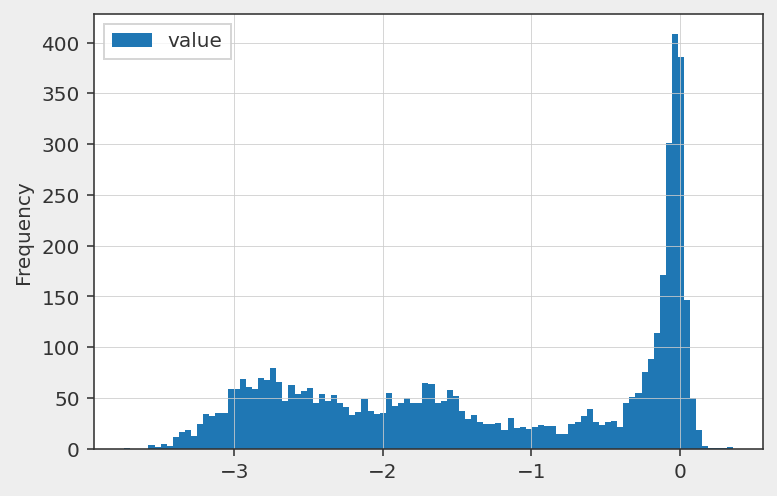

In [6]:
dataset.mut_df.plot.hist(bins=100)
# As seen, most of the mutations result in loss of finction

In [7]:
# These are 1-hot encoded tensors of the MSA's
dataset.msa_tensors

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

Text(0, 0.5, 'Aminoacid')

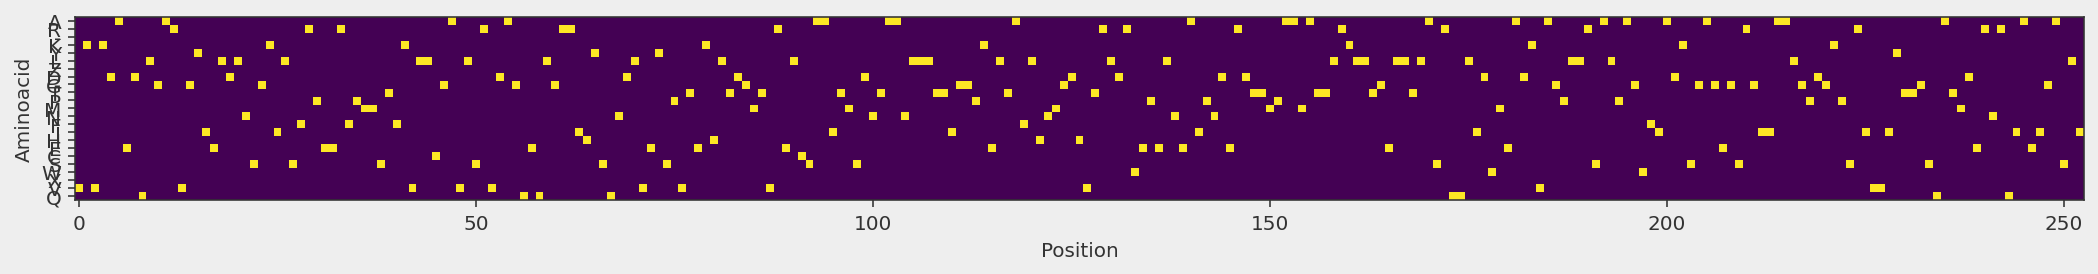

In [8]:
# Let's display our wildtype protein (first MSA in list)
plt.figure(figsize=(18,10))
plt.imshow(dataset.msa_tensors[0])
plt.grid(None)
plt.yticks(ticks=range(len(dataset.alphabet)), labels=dataset.alphabet);
plt.xlabel("Position")
plt.ylabel("Aminoacid")

In [9]:
dataset.msa_weights # The weights!

tensor([0.0027, 0.0026, 0.0027,  ..., 0.1667, 0.3333, 0.1667])

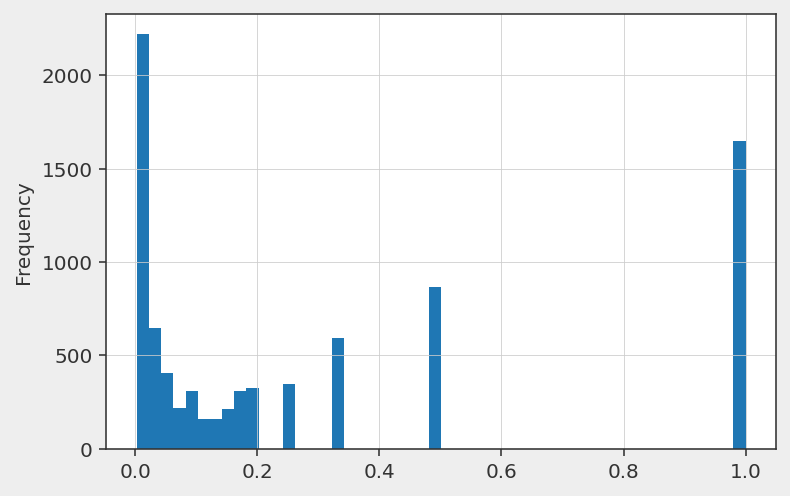

In [10]:
pd.Series(dataset.msa_weights).plot.hist(bins=50);